In [32]:
using HorizonSideRobots
using PyPlot; pygui(true)
h = 10
w = 10
r = Robot(h, w)
show!(r)

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\polya\.julia\packages\HorizonSideRobots\UumzG\src\HorizonSideRobots.jl:187


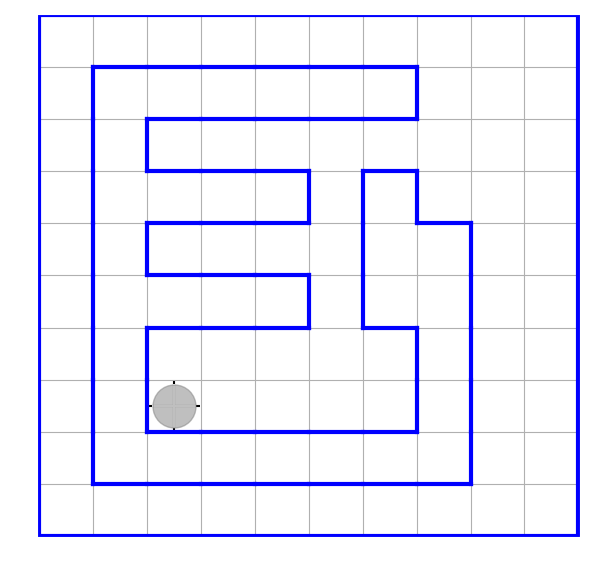

In [33]:
show(r)

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\polya\.julia\packages\HorizonSideRobots\UumzG\src\HorizonSideRobots.jl:187


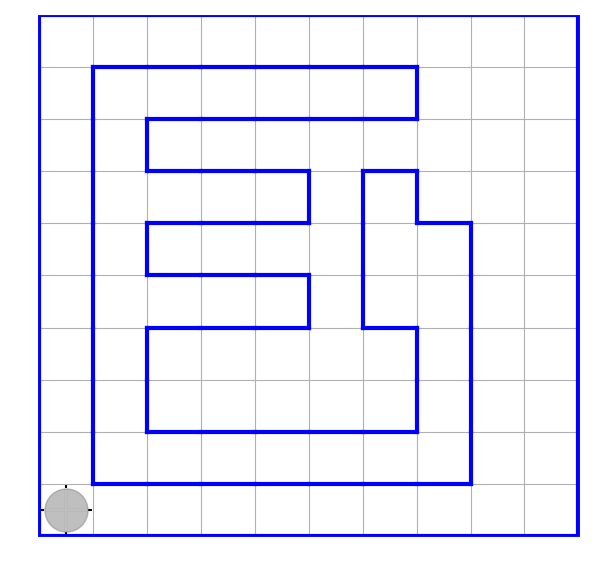

In [34]:
visited = falses(2*w, 2*h)
x, y = w, h
dx = [0, -1, 0, 1]
dy = [1, 0, -1, 0]

function to_side(dif_x, dif_y)
    if dif_x == 0 && dif_y == 1 
        return Nord
    elseif dif_x == -1 && dif_y == 0
        return West
    elseif dif_x == 0 && dif_y == -1
        return Sud
    elseif dif_x == 1 && dif_y == 0
        return Ost
    end
end

function inverse_side(side)
    return HorizonSide(((Int(side)) + 2) % 4)
end

current_path = Vector()
best_path = Vector()
min_x, min_y = w, h

function dfs(r, x, y)
    global min_x, min_y, current_path, best_path
    if visited[x, y]
        return
    end
    if(min_x >= x && min_y >= y)
        best_path = current_path[1:end]
        min_x = x
        min_y = y
    end
    visited[x, y] = true
    for (difx, dify) in zip(dx, dy)
        nx, ny = x+difx, y+dify
        if (nx > 0 && nx <= 2*w && ny > 0 && ny <= 2*h)
            side = to_side(difx, dify)
            if(!visited[nx, ny] && !isborder(r, side))
                side = to_side(difx, dify)
                push!(current_path, side)
                move!(r, side)
                dfs(r, nx, ny)
                move!(r, inverse_side(side))
                pop!(current_path)
            end
        end
    end
end

function get_to_south_west(r, x, y)
    global min_x, min_y, current_path, best_path
    dfs(r, x, y)
    count = 0
    for side in best_path
        move!(r, side)
    end
end

get_to_south_west(r, w, h)
show(r)